Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

## Exercise 3: Classification

### 3.1. Should we play golf?
The Golf data set models different aspects of the weather (outlook, temperature, humidity, forecast) that are relevant for deciding whether one should play golf or not.

In [90]:
##### 1.golf Data
import pandas as pd
golf = pd.read_csv('/Users/damin/Desktop/hw-6/golf.csv')
golf

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes
5,rain,65.0,70.0,True,no
6,overcast,64.0,65.0,True,yes
7,sunny,72.0,95.0,False,no
8,sunny,69.0,70.0,False,yes
9,rain,75.0,80.0,False,yes


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(golf_preprocessed, golf_target)

DecisionTreeClassifier()

#### 3.1.1 Learn a decision tree model from the Golf data set. Use this model to classify the examples in the Golf-Testset. 

- Think about ways how you can evaluate the performance of your model. 
- Which measures can be calculated from the resulting dataset?

In [76]:
from sklearn import preprocessing

golf_preprocessed = golf.copy()

# remove the target variable from the dataframe and encode it
golf_target = golf['Play']
golf_preprocessed = golf.drop(columns='Play')

label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

# encode the categorical attributes 'Outlook' and 'Wind'
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(golf_preprocessed[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names(['Outlook', 'Wind']))

golf_preprocessed = golf_preprocessed.drop(columns=['Outlook', 'Wind'])
golf_preprocessed = golf_preprocessed.join(encoded)
golf_preprocessed

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,0.0,0.0,1.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,1.0,0.0
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0
9,75.0,80.0,0.0,1.0,0.0,1.0,0.0


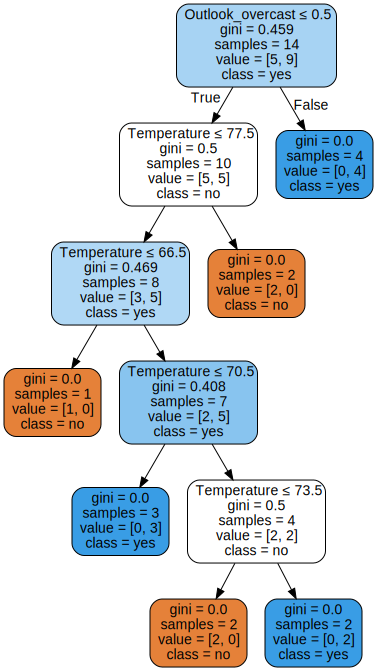

In [11]:
import graphviz
from sklearn import tree

# learn a decision tree and visualise it
### A. TreeClassifier을 사용하여 golf_testset 분류하기
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=golf_preprocessed.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data)
display(graph)

In [35]:
# load the test set and apply the same preprocessing as for the training set
golf_test = pd.read_csv('/Users/damin/Desktop/hw-6/golf_testset.csv')
golf_test

# remove the target variable from the dataframe and encode it
golf_target_test = golf_test['Play']
golf_test = golf_test.drop(columns='Play')

golf_target_test = label_encoder.transform(golf_target_test)

# encode the categorical attributes 'Outlook' and 'Wind'
encoded = pd.DataFrame(encoder.transform(golf_test[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names(['Outlook', 'Wind']))
golf_test = golf_test.drop(columns=['Outlook', 'Wind'])

golf_test = golf_test.join(encoded)
golf_test

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0
9,75.0,80.0,0.0,0.0,1.0,1.0,0.0


In [48]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

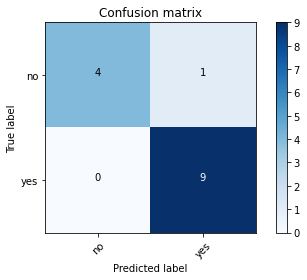

In [42]:
cnf_matrix = confusion_matrix(golf_target, golf_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)

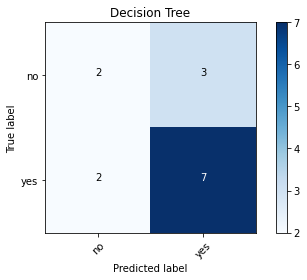

In [43]:
# apply the model and compare the predictions to the actual values of the target variable
golf_prediction = dt.predict(golf_test)
cnf_matrix = confusion_matrix(golf_target_test, golf_prediction)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Decision Tree')
plt.show()

#### 3.1.2 Evaluate the performance of your model.
- by calling confusion_matrix and accuracy_score
- examine the confusion matrix. What is the accuracy of your classifier?

In [49]:
### B. confusion_matrix와 accuracy)score로 성능 평가하기
# create the confusion matrix and visualise it
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

golf_prediction = label_encoder.transform(['yes','no','yes','yes','no','yes','yes','no','no','no','no','no','no','yes'])

display(golf_target)
display(golf_prediction)

print("Confusion Matrix:")
print(confusion_matrix(golf_target, golf_prediction))
print()

# calculate the accuracy of your classifier
print("Accuracy: {}".format(accuracy_score(golf_target, golf_prediction)))

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

Confusion Matrix:
[[2 3]
 [6 3]]

Accuracy: 0.35714285714285715


#### 3.1.3 Does a k-nearest-neighbor classifier work better for this task? 
- Check how the accuracy of your classifier changes to find out. 
- Do different values of k improve the performance?

In [196]:
### C. KNN이 더 효과적인가
# learn KNN classifiers for different values of K and compare their accuracy
from sklearn.neighbors import KNeighborsClassifier

# Train classifier
knn_estimator = KNeighborsClassifier(n_neighbors=3)
knn_estimator.fit(golf_preprocessed, golf_target)

# Use classifier to predict labels
prediction = knn_estimator.predict(golfTest_preprocessed)
prediction
print('[KNN] golf data 정확도 :', knn_estimator.score(golf_preprocessed, golf_target))  # k=3일 때 정확도가 가장 높음

[KNN] golf data 정확도 : 0.7857142857142857


### 3.2. Learning a classifier for the Iris Data Set
You want to learn and evaluate a classifier for recognizing different types of Iris flowers.

#### 3.2.1 Let’s try the decision tree classifier first. 
Create a train/test split (with function train_test_split) with 30% test size and stratified sampling.  Evaluate the accuracy of the learned model.

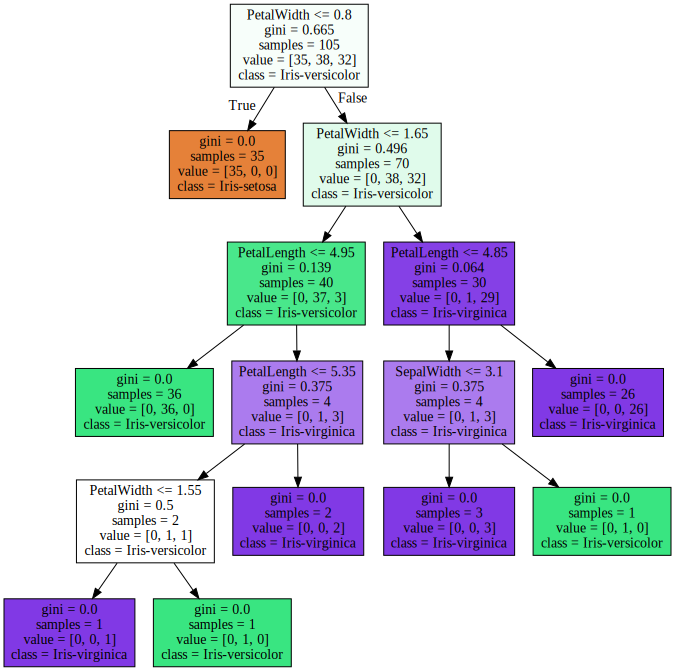

iris Test data accuracy score : 0.9777777777777777


In [197]:
##### 2.iris Data
### A. 의사결정트리로 정확도 평가하기
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from sklearn.metrics import accuracy_score

# load the iris dataset
iris_data = pd.read_csv('/Users/damin/Desktop/hw-6/iris.csv')
iris_data

iris_target = iris_data['Name']
iris_preprocessed = iris_data.drop(columns='Name')

# create a train/test split
X_train, X_test, Y_train, Y_test = train_test_split(iris_preprocessed, iris_target, test_size=0.3, random_state=24)

# learn a decision tree
DTC= DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, Y_train)
pred = DTC.predict(X_test)

# train tree 그리기
dot_data = export_graphviz(DTC, out_file='tree.dot', 
                feature_names = iris_preprocessed.columns, 
                class_names = ["Iris-setosa", "Iris-versicolor","Iris-virginica"], 
                impurity=True, filled =True)

# visualise it
with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# evaluate it
print(f'iris Test data accuracy score : {accuracy_score(Y_test, pred)}')

#### 3.2.2 Try a k-nearest-neighbor classifier on the problem. Does it perform better?

In [198]:
### B. KNN로 성능평가하기
# learn KNN classifiers for different values of K and compare their accuracy
# Train classifier
knn_estimator = KNeighborsClassifier(n_neighbors=6)
knn_estimator.fit(X_train, Y_train)

# Use classifier to predict labels
prediction = knn_estimator.predict(X_test)
prediction
print('[KNN] iris data 정확도 :', knn_estimator.score(X_train, Y_train))  # k=6일 때 정확도가 가장 높음

[KNN] iris data 정확도 : 0.9809523809523809
